In [1]:
import pandas as pd
import numpy as np
from logistical_regression import LogisticalRegression
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('banknote_dataset.txt', sep=',')
data = data.sample(frac=1)

In [3]:
data.head()

,variance,skewness,curtosis,entropy,class
652,4.6439,-3.3729,2.59760,0.55257,0
899,-1.4446,2.1438,-0.47241,-1.66770,1
1309,-4.2887,-7.8633,11.83870,-1.89780,1
1206,-2.4349,-9.2497,8.99220,-0.50001,1
1238,-1.0941,2.3072,-2.52370,-1.44530,1


In [4]:
data_x = data.drop(['class'], axis=1).values
data_y = data['class'].values
data_x_train = data_x[:int(len(data_x) * 4 / 5)]
data_y_train = data_y[:int(len(data_y) * 4 / 5)]
data_x_test = data_x[int(len(data_x) * 4 / 5):]
data_y_test = data_y[int(len(data_y) * 4 / 5):]

In [5]:
history_test_1 = []
history_test_2 = []
history_test_3 = []
for epoch in range(1, 100):
    model = LogisticalRegression()
    model.fit(data_x_train, data_y_train, epochs=epoch, lr=0.001)
    history_test_1.append(model.score(data_x_test, data_y_test)['f1'])
    model = LogisticalRegression()
    model.fit(data_x_train, data_y_train, epochs=epoch, lr=0.0001)
    history_test_2.append(model.score(data_x_test, data_y_test)['f1'])
    model = LogisticalRegression()
    model.fit(data_x_train, data_y_train, epochs=epoch, lr=0.00001)
    history_test_3.append(model.score(data_x_test, data_y_test)['f1'])

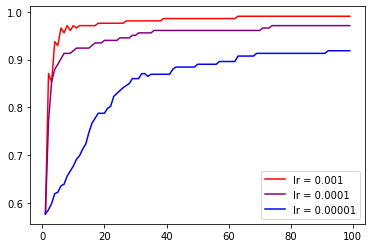

In [6]:
plt.plot(range(1, 100), history_test_1, c='red', label='lr = 0.001')
plt.plot(range(1, 100), history_test_2, c = 'purple', label='lr = 0.0001')
plt.plot(range(1, 100), history_test_3, 'blue', label='lr = 0.00001')
plt.legend()
plt.show()